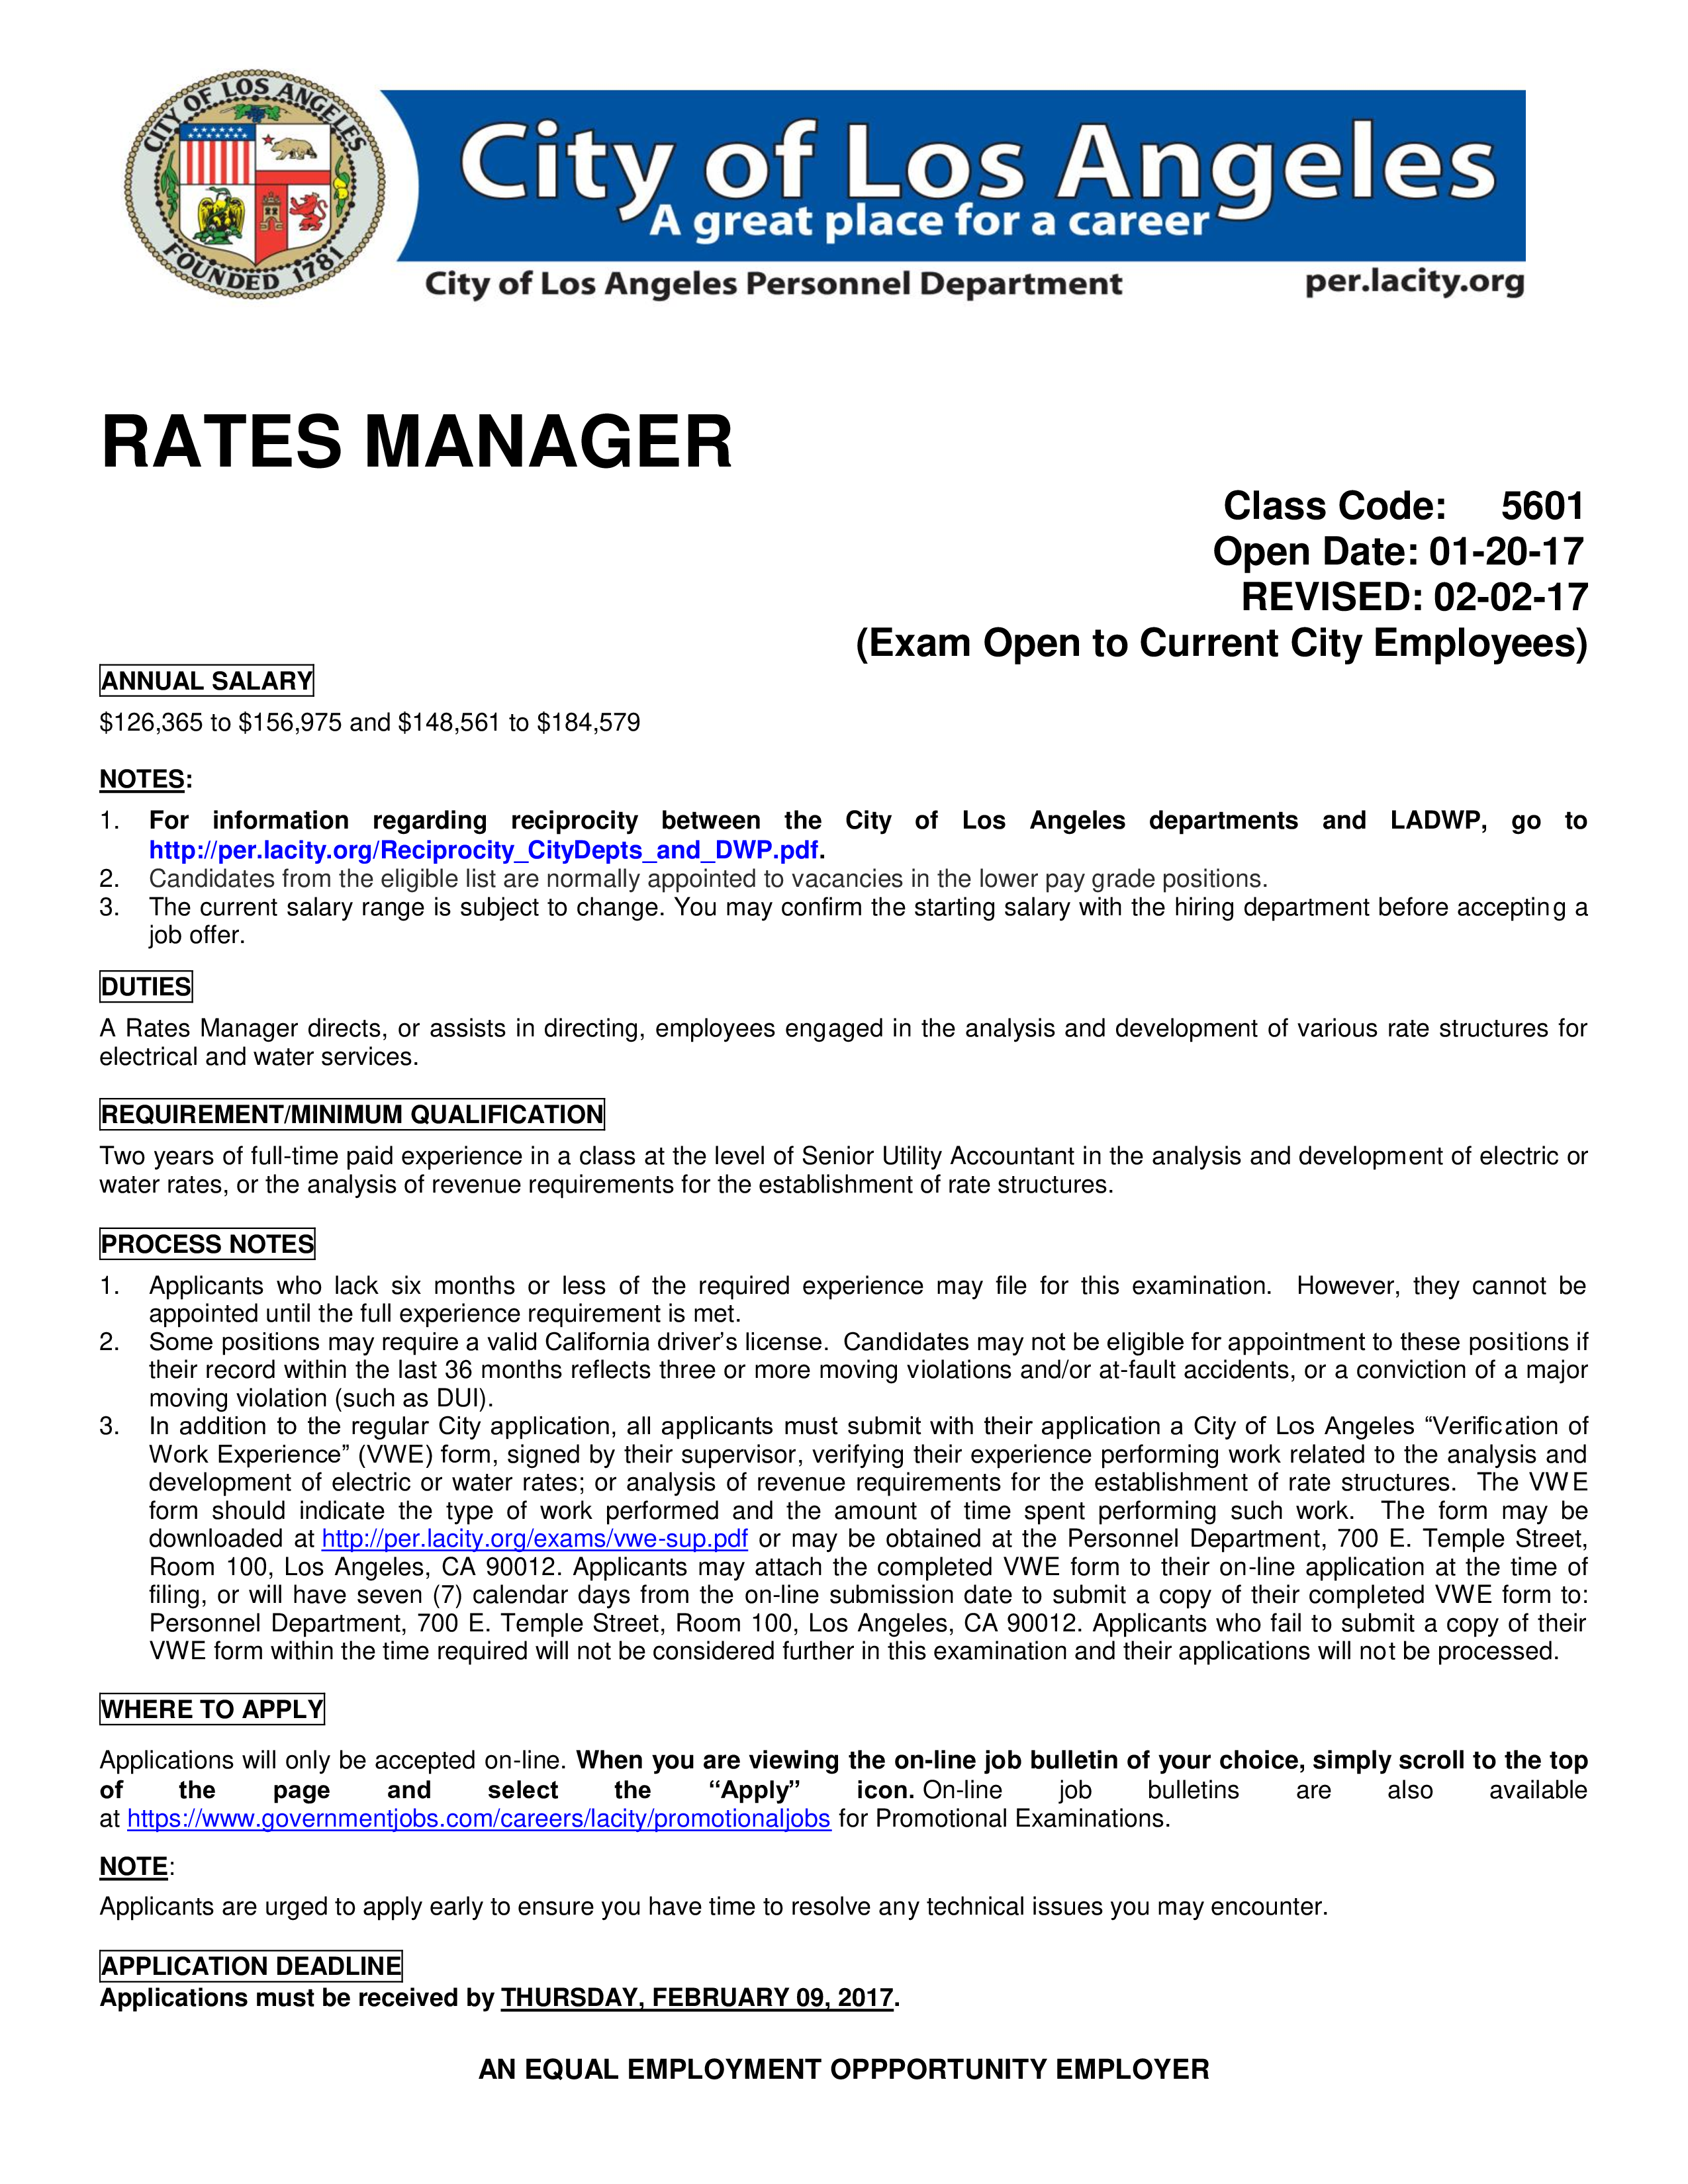

In [1]:


from wand.image import Image as Img
Img(filename='../input/cityofla/CityofLA/Additional data/PDFs/2017/february 2017/RATES MANAGER 5601 REVISED.pdf', resolution=300)



In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os
import numpy as np
from datetime import datetime
from collections  import Counter
from nltk import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
print(os.listdir("../input"))
from gensim.models import word2vec
from sklearn.manifold import TSNE
from nltk import pos_tag
from nltk.help import upenn_tagset
import gensim
import matplotlib.colors as mcolors
from nltk import jaccard_distance
from nltk import ngrams
#import textstat
plt.style.use('ggplot')



['cityofla']


In [3]:
# job descriptions that are in the format of the text files
# additional data which is in the format of pdf and images
bulletins=os.listdir("../input/cityofla/CityofLA/Job Bulletins/")
additional=os.listdir("../input/cityofla/CityofLA/Additional data/")

In [4]:
# checking all the subsdaries
files=[dir for dir in os.walk('../input/cityofla')]
for file in files:
    print(os.listdir(file[0]))
    print("\n")

['CityofLA']


['Additional data', 'Job Bulletins']


['PDFs', 'Description of promotions in job bulletins.docx', 'job_titles.csv', 'sample job class export template.csv', 'City Job Paths', 'job bulletins with annotations', 'kaggle_data_dictionary.csv']


['2018', '2016', '2017', '2015', '2014']


['December', 'April', 'November', 'October', 'August', 'June', 'May', 'February', 'September', 'March', 'July', 'January']


['Dec 7', 'Dec 14']


['SENIOR PERSONNEL ANALYST 9167 120718.pdf', 'COMMERCIAL FIELD REPRESENTATIVE 1600 120718.pdf', 'HARBOR ENGINEER 9279 120718.pdf', 'Job 12072018 Summary.pdf', 'CITY PLANNER 7944 120718.pdf', 'WASTEWATER TREATMENT OPERATOR 120718.pdf']


['MECHANICAL ENGINEERING DRAFTING TECHNICIAN 7551 121418.pdf', 'SENIOR SECURITY OFFICER 3184 121418.pdf', 'UNDERGROUND DISTRIBUTION CONSTRUCTION SUPERVISOR 3814 121418.pdf', 'WATER UTILITY SUPERINTENDENT 3980 121418.pdf', 'CABLE TELEVISION PRODUCTION MANAGER 1801 121418.pdf', 'Job 12142018 Summary.pdf', 'DUPLICATING

In [5]:
csvfiles=[]
for file in additional:
    if file.endswith('.csv'):
        print(file)
        csvfiles.append("../input/cityofla/CityofLA/Additional data/"+file)

job_titles.csv
sample job class export template.csv
kaggle_data_dictionary.csv


In [6]:
print(csvfiles)

['../input/cityofla/CityofLA/Additional data/job_titles.csv', '../input/cityofla/CityofLA/Additional data/sample job class export template.csv', '../input/cityofla/CityofLA/Additional data/kaggle_data_dictionary.csv']


In [7]:
job_titles = csvfiles[0]
job_titles = pd.read_csv(job_titles)
print("The number of rows are %d and columns are %d"%(job_titles.shape))

The number of rows are 667 and columns are 1


In [8]:
display(job_titles)

,311 DIRECTOR
0,ACCOUNTANT
1,ACCOUNTING CLERK
2,ACCOUNTING RECORDS SUPERVISOR
3,ADMINISTRATIVE ANALYST
4,ADMINISTRATIVE CLERK
5,ADMINISTRATIVE HEARING EXAMINER
6,ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE
7,AIR CONDITIONING MECHANIC
8,AIR CONDITIONING MECHANIC SUPERVISOR
9,AIRPORT AIDE


In [9]:
job_sample_class = csvfiles[1]
job_sample_class = pd.read_csv(job_sample_class)
print("The number of rows are %d and columns are %d"%(job_sample_class.shape))

The number of rows are 5 and columns are 25


In [10]:
job_sample_class.head()

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,REQUIREMENT_SUBSET_ID,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,EXP_JOB_CLASS_ALT_RESP,EXP_JOB_CLASS_FUNCTION,COURSE_COUNT,COURSE_LENGTH,COURSE_SUBJECT,MISC_COURSE_DETAILS,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,ADDTL_LIC,EXAM_TYPE,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE
0,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,1,A,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,COMPUTER SCIENCE|INFORMATION SYSTEMS|GEOGRAPHI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
1,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,2,A,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,NaN,2.0,FULL-TIME,MANAGEMENT ASSISTANT,NaN,"the development, analysis, implementation or m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
2,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,2,B,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,NaN,2.0,FULL-TIME,MANAGEMENT ASSISTANT,NaN,"performing cost benefit, feasibility and requi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
3,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,2,C,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,NaN,2.0,FULL-TIME,MANAGEMENT ASSISTANT,NaN,performing system implementation and support a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
4,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,3,A,"A Systems Analyst analyzes procedures, methods...",NaN,NaN,NaN,2.0,FULL-TIME,SYSTEMS AIDE,NaN,NaN,4.0,"3M, 4Q",INFORMATION SYSTEMS|SYSTEMS ANALYSIS|closely r...,At least three of the courses must be from the...,M,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17


In [11]:
kaggle_data_dictionary = csvfiles[2]
kaggle_data_dictionary = pd.read_csv(kaggle_data_dictionary)
print("The number of rows are %d and columns are %d"%(kaggle_data_dictionary.shape))

The number of rows are 25 and columns are 7


In [12]:
kaggle_data_dictionary.head()

,Field Name,Annotation Letter,Description,Data Type,Allowable Values,Accepts Null Values?,Additional Notes
0,FILE_NAME,NaN,The file name of the job bulletin from which e...,String,NaN,No,NaN
1,JOB_CLASS_TITLE,A,"The title of the particular class (e.g., Syste...",String,Any job title matching in in supplied job bull...,No,NaN
2,JOB_CLASS_NO,B,The 4-digit code that corresponds to the job c...,String,Any four character numeric string matching one...,No,Some classes have three non-zero digits — e.g....
3,REQUIREMENT_SET_ID,D1,A main requirement that has to be filled. Thes...,Integer,Any positive integer,No,NaN
4,REQUIREMENT_SUBSET_ID,D2,"A secondary requirement that has to be filled,...",String,Any letter or combination of letters.,No,"A-Z represents 1-26. In the case of 27th, 28th..."


In [13]:
#let's checkout how many files are there in our bulletins
print("There are about %d files in our bulletins"%len(bulletins))

There are about 683 files in our bulletins


In [14]:
# code taken from https://www.kaggle.com/shahules/discovering-opportunities-at-la
def get_headings(bulletin):       
    
    """"function to get the headings from text file
        takes a single argument
        1.takes single argument list of bulletin files"""
    
    with open("../input/cityofla/CityofLA/Job Bulletins/"+bulletins[bulletin]) as f:    ##reading text files 
        data=f.read().replace('\t','').split('\n')
        data=[head for head in data if head.isupper()]
        return data
        
def clean_text(bulletin):      
    
    
    """function to do basic data cleaning
        takes a single argument
        1.takes single argument list of bulletin files"""
                                            
    
    with open("../input/cityofla/CityofLA/Job Bulletins/"+bulletins[bulletin]) as f:
        data=f.read().replace('\t','').replace('\n','')
        return data
    
     


In [15]:
#lets read file 
with open('../input/cityofla/CityofLA/Job Bulletins/SENIOR HOUSING INSPECTOR 4244 042718.txt','r') as f:
    data = f.read()
    print(data)
    f.close()
    

SENIOR HOUSING INSPECTOR

Class Code:       4244
Open Date:  04-27-18
                                                                      (Exam Open to Current City Employees)

ANNUAL SALARY 

$90,410 to $109,306

NOTE:

1. Annual salary is at the start of the pay range. The current salary range is subject to change. Please confirm the starting salary with the hiring department before accepting a job offer.
2. Candidates from the eligible list are normally appointed to vacancies in the lower pay grade positions.

DUTIES

A Senior Housing Inspector supervises employees engaged either in the inspection of residential rental property locations for conformance to housing habitability, quality, and property maintenance ordinances; or in the investigation of code violation complaints and the following through with the code enforcement process by way of litigation or administrative abatement; and personally conducts the more difficult field inspections.

REQUIREMENT/MINIMUM QUALIFICATION

T

In [16]:
get_headings(1)

['SENIOR COMMUNICATIONS ELECTRICIAN',
 'ANNUAL SALARY',
 'NOTES:',
 'DUTIES',
 'REQUIREMENT/MINIMUM QUALIFICATION',
 'PROCESS NOTES',
 'WHERE TO APPLY',
 'NOTE:',
 'APPLICATION DEADLINE',
 'SELECTION PROCESS ',
 'NOTES:',
 'THIS EXAMINATION IS TO BE GIVEN ONLY',
 'ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS',
 'AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER']

In [17]:
get_headings(2)

['SENIOR AUTOMOTIVE SUPERVISOR',
 'ANNUAL SALARY',
 'NOTE:',
 'DUTIES',
 'REQUIREMENT',
 'NOTES:',
 'WHERE TO APPLY',
 'NOTE:',
 'APPLICATION DEADLINE',
 'SELECTION PROCESS',
 'NOTES:',
 'THIS EXAMINATION IS TO BE GIVEN ONLY',
 'ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS',
 'AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER']

In [18]:
def to_dataframe(num,df):
    """"function to extract features from job bulletin text files and convert to
    pandas dataframe.
    function take two arguments 
                        1.the number of files to be read
                        2.dataframe object                                      """
    

    
    opendate=re.compile(r'(Open [D,d]ate:)(\s+)(\d\d-\d\d-\d\d)')       #match open date
    
    salary=re.compile(r'\$(\d+,\d+)((\s(to|and)\s)(\$\d+,\d+))?')       #match salary
    
    requirements=re.compile(r'(REQUIREMENTS?/\s?MINIMUM QUALIFICATIONS?)(.*)(PROCESS NOTE)')      #match requirements
    
    for no in range(0,num):
        with open("../input/cityofla/CityofLA/Job Bulletins/"+bulletins[no],encoding="ISO-8859-1") as f:         #reading files 
                try:
                    file=f.read().replace('\t','')
                    data=file.replace('\n','')
                    headings=[heading for heading in file.split('\n') if heading.isupper()]             ##getting heading from job bulletin

                    sal=re.search(salary,data)
                    date=datetime.strptime(re.search(opendate,data).group(3),'%m-%d-%y')
                    try:
                        req=re.search(requirements,data).group(2)
                    except Exception as e:
                        req=re.search('(.*)NOTES?',re.findall(r'(REQUIREMENTS?)(.*)(NOTES?)',
                                                              data)[0][1][:1200]).group(1)
                    
                    duties=re.search(r'(DUTIES)(.*)(REQ[A-Z])',data).group(2)
                    try:
                        enddate=re.search(
                                r'(JANUARY|FEBRUARY|MARCH|APRIL|MAY|JUNE|JULY|AUGUST|SEPTEMBER|OCTOBER|NOVEMBER|DECEMBER)\s(\d{1,2},\s\d{4})'
                                ,data).group()
                    except Exception as e:
                        enddate=np.nan
                    
                    selection= [z[0] for z in re.findall('([A-Z][a-z]+)((\s\.\s)+)',data)]     ##match selection criteria
                    
                    df=df.append({'File Name':bulletins[no],'Position':headings[0].lower(),'salary_start':sal.group(1),
                               'salary_end':sal.group(5),"opendate":date,"requirements":req,'duties':duties,
                                'deadline':enddate,'selection':selection},ignore_index=True)
                    
                    
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)\s(years?)\s(of\sfull(-|\s)time)')
                    df['EXPERIENCE_LENGTH']=df['requirements'].apply(lambda x :  re.search(reg,x).group(1) if re.search(reg,x) is not None  else np.nan)
                    df['FULL_TIME_PART_TIME']=df['EXPERIENCE_LENGTH'].apply(lambda x:  'FULL_TIME' if x is not np.nan else np.nan )
                    
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)(\s|-)(years?)\s(college)')
                    df['EDUCATION_YEARS']=df['requirements'].apply(lambda x :  re.search(reg,x).group(1) if re.search(reg,x) is not None  else np.nan)
                    df['SCHOOL_TYPE']=df['EDUCATION_YEARS'].apply(lambda x : 'College or University' if x is not np.nan else np.nan)
                    
                except Exception as e:
                    print('umatched sequence')
                    
                    
                
                
        
           
    return df

In [19]:
df=pd.DataFrame(columns=['File Name','Position','salary_start','salary_end','opendate','requirements','duties','deadline'])
df=to_dataframe(len(bulletins),df)
df.to_csv('job class output.csv')

umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence


In [20]:
df.shape

(660, 13)

In [21]:
df.head()

,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE
0,ARTS ASSOCIATE 2454 072117 REV 072817.txt,arts associate,"48,797","$71,326",2017-07-21,1. A bachelor's degree from an accredited four...,An Arts Associate performs a broad range of en...,"AUGUST 3, 2017",[Essay],two,FULL_TIME,four,College or University
1,SENIOR COMMUNICATIONS ELECTRICIAN 3638 030317 ...,senior communications electrician,"94,941",None,2017-03-03,Two years of full-time paid experience in a cl...,A Senior Communications Electrician acts as a ...,"MARCH 16, 2017",[Interview],Two,FULL_TIME,NaN,NaN
2,SENIOR AUTOMOTIVE SUPERVISOR 3716 112015.txt,senior automotive supervisor,"103,126","$111,875",2015-11-20,Two years of full-time paid experience with th...,A Senior Automotive Supervisor assists in plan...,"DECEMBER 3, 2015","[Essay, Interview]",Two,FULL_TIME,NaN,NaN
3,WASTEWATER COLLECTION WORKER 4110 102612 REV 0...,wastewater collection worker,"43,973","$62,556",2012-10-26,1. One year of full-time paid experience with ...,A Wastewater Collection Worker performs a vari...,NaN,[Test],One,FULL_TIME,NaN,NaN
4,SENIOR STOREKEEPER 1837 052518.txt,senior storekeeper,"52,806","$77,172",2018-05-25,Two years of full-time paid experience as a St...,"A Senior Storekeeper assigns, reviews and eval...","JUNE 7, 2018","[Test, Interview]",Two,FULL_TIME,NaN,NaN


In [22]:


data_dictionary=pd.DataFrame({'Field Name':['File Name','Position','salary_start','salary_end','opendate',
                                            'requirements','duties','deadline','selection','EXPERIENCE_LENGTH','FULL_TIME_PART_TIME','EDUCATION_YEARS','SCHOOL_TYPE'],
                             })

data_dictionary['Description']=['The file name of the job bulletin from which each record came','The title of the particular class (e.g., Systems Analyst, Carpenter)',
                              'The overall salary start','The overall maximum salary','The date the job bulletin opened','Overall requirement that has to be filled',
                              'A summary of what someone does in the particular job\n','The date the job bulletin closed','list of selection criterias','Years required in a particular job class or external role.',
                              'Whether the required experience is full-time, part','Years required in a particular education program',
                               'School Type: School type required (e.g. college or university, high school)']

data_dictionary['Data Type']=['string']*13

data_dictionary['Accepts Null Values?']=['Yes']*13



In [23]:
data_dictionary

,Field Name,Description,Data Type,Accepts Null Values?
0,File Name,The file name of the job bulletin from which e...,string,Yes
1,Position,"The title of the particular class (e.g., Syste...",string,Yes
2,salary_start,The overall salary start,string,Yes
3,salary_end,The overall maximum salary,string,Yes
4,opendate,The date the job bulletin opened,string,Yes
5,requirements,Overall requirement that has to be filled,string,Yes
6,duties,A summary of what someone does in the particul...,string,Yes
7,deadline,The date the job bulletin closed,string,Yes
8,selection,list of selection criterias,string,Yes
9,EXPERIENCE_LENGTH,Years required in a particular job class or ex...,string,Yes


In [24]:
data_dictionary.to_csv('data dictionary.csv')

In [25]:
print('There are %d different jobs available' %df['Position'].nunique())

There are 650 different jobs available


[('engineering', 24), ('services', 23), ('construction', 14), ('maintenance', 14), ('supervisorsenior', 14), ('utility', 14), ('service', 14), ('electrical', 12), ('systems', 12), ('drafting', 12)]
['engineering', 'services', 'construction', 'maintenance', 'supervisorsenior', 'utility', 'service', 'electrical', 'systems', 'drafting']
[24, 23, 14, 14, 14, 14, 14, 12, 12, 12]


Text(0, 0.5, 'sector')

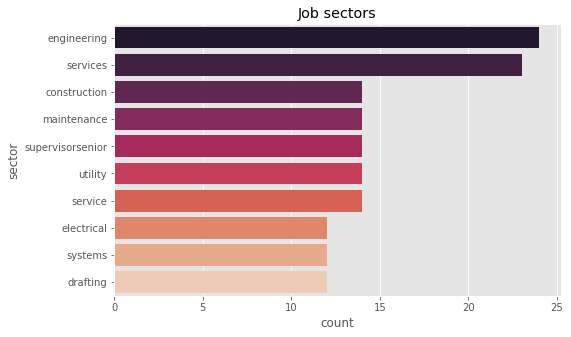

In [26]:
plt.figure(figsize=(8,5))
text=''.join(job for job in df['Position'])                                ##joining  data to form text
text=word_tokenize(text)
jobs=Counter(text)                                                         ##counting number of occurences
jobs_class=[job for job in jobs.most_common(12) if len(job[0])>3]          ##selecting most common words
print(jobs_class)
#offers=[job[1] for job in jobs.most_common(12) if len(job[0]>3)]
a,b=map(list, zip(*jobs_class))
print(a)
print(b)
sns.barplot(b,a,palette='rocket')                                           ##creating barplot
plt.title('Job sectors')
plt.xlabel("count")
plt.ylabel('sector')

In [27]:
""""
    convert salary to proper  form 
    by removing '$' and ',' symbols.
                                    """

df['salary_start']=[int(sal.split(',')[0]+sal.split(',')[1] ) for sal in df['salary_start']]   
df['salary_end']=[sal.replace('$','')  if sal!= None else 0 for sal in df['salary_end']  ]
df['salary_end']=[int(sal.split(',')[0]+sal.split(',')[1] ) if type(sal)!=int else 0 for sal in df['salary_end']]

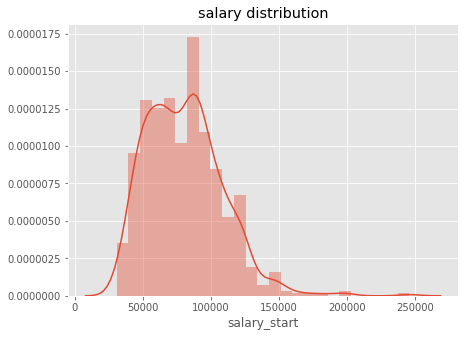

In [28]:
plt.figure(figsize=(7,5))
sns.distplot(df['salary_start'])
plt.title('salary distribution')
plt.show()

Text(0.5, 1.0, 'Best paid jobs in LA')

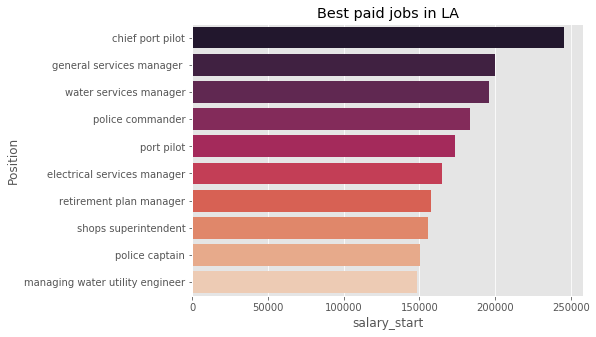

In [29]:
'''finding the most paid 10 jobs at LA'''

most_paid=df[['Position','salary_start']].sort_values(by='salary_start',ascending=False)[:10]
plt.figure(figsize=(7,5))
sns.barplot(y=most_paid['Position'],x=most_paid['salary_start'],palette='rocket')
plt.title('Best paid jobs in LA')

In [30]:
''''calculating salary start - salary end '''

df['salary_diff']=abs(df['salary_start']-df['salary_end'])

ranges=df[['Position','salary_diff']].sort_values(by='salary_diff',ascending=False)[:10]

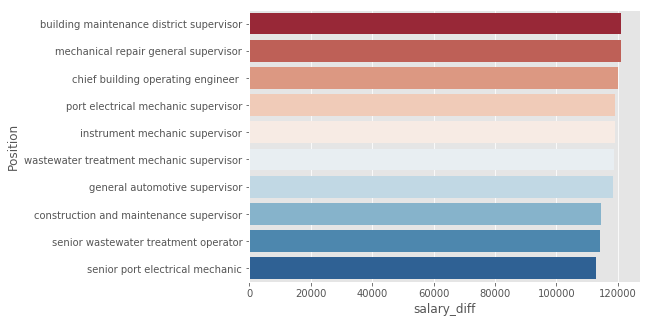

In [31]:
plt.figure(figsize=(7,5))
sns.barplot(y=ranges['Position'],x=ranges['salary_diff'],palette='RdBu')   ##plotting

In [32]:
ranges

,Position,salary_diff
476,building maintenance district supervisor,121166
514,mechanical repair general supervisor,121166
28,chief building operating engineer,119997
273,port electrical mechanic supervisor,119172
511,instrument mechanic supervisor,119036
101,wastewater treatment mechanic supervisor,118843
545,general automotive supervisor,118577
486,construction and maintenance supervisor,114485
243,senior wastewater treatment operator,114234
188,senior port electrical mechanic,112955


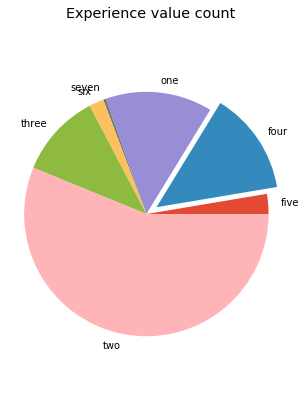

In [33]:
experience=df['EXPERIENCE_LENGTH'].value_counts().reset_index()
experience['index']=experience['index'].apply(lambda x : x.lower())
experience=experience.groupby('index',as_index=False).agg('sum')
labels=experience['index']
sizes=experience['EXPERIENCE_LENGTH']
plt.figure(figsize=(5,7))
plt.pie(sizes,explode=(0, 0.1, 0, 0,0,0,0),labels=labels)
plt.gca().axis('equal')
plt.title('Experience value count')
plt.show()

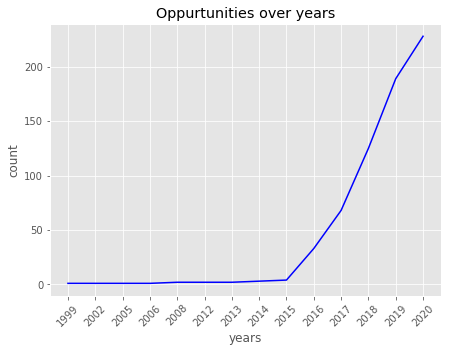

In [34]:
'''Extracting year out of opendate timestamp object and counting
    the number of each occurence of each year using count_values() '''

df['year_of_open']=[date.year for date in df['opendate']]

count=df['year_of_open'].value_counts(ascending=True)
years=['2020','2019','2018', '2017', '2016', '2015', '2014', '2013', '2012', '2008', '2006',
           '2005', '2002', '1999']
plt.figure(figsize=(7,5))
plt.plot([z for z in reversed(years)],count.values,color='blue')

plt.title('Oppurtunities over years')
plt.xlabel('years')
plt.ylabel('count')
plt.gca().set_xticklabels([z for z in reversed(years)],rotation='45')
plt.show()